In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
from collections import Counter

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# <u> 1. Data Set Description <u>

Important columns in <b> df </b> are:
<ol>
<li> <b> types </b>: type of package - app, sub or bundle </li>
<li> <b> name </b>: Name of a game </li>
<li> <b> recent_reviews </b>: recent reviews </li>
<li> <b> all_reviews </b>: all reviews </li>
<li> <b> release_date </b>: release date </li>
<li> <b> popular_tags </b>: tags </li>
<li> <b> game_details </b>: details of a game </li>
<li> <b> languages </b>: supported languages </li>
<li> <b> achievements </b>: number of achievements </li>
<li> <b> genre </b>: genre(s) of a game </li>
<li> <b> original_price </b>: price without discount </li>
<li> <b> discount_price </b>: price with discount </li>

# 2. Understand the Data

read file

In [2]:
df = pd.read_csv("steam_games.csv")

In [3]:
len(df)

40833

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       40833 non-null  object 
 1   types                     40831 non-null  object 
 2   name                      40817 non-null  object 
 3   desc_snippet              27612 non-null  object 
 4   recent_reviews            2706 non-null   object 
 5   all_reviews               28470 non-null  object 
 6   release_date              37654 non-null  object 
 7   developer                 40490 non-null  object 
 8   publisher                 35733 non-null  object 
 9   popular_tags              37888 non-null  object 
 10  game_details              40313 non-null  object 
 11  languages                 40797 non-null  object 
 12  achievements              12194 non-null  float64
 13  genre                     40395 non-null  object 
 14  game_d

# <u> 3. Data Cleaning

In [5]:
df

url types  \
0        https://store.steampowered.com/app/379720/DOOM/   app   
1      https://store.steampowered.com/app/578080/PLAY...   app   
2      https://store.steampowered.com/app/637090/BATT...   app   
3        https://store.steampowered.com/app/221100/DayZ/   app   
4      https://store.steampowered.com/app/8500/EVE_On...   app   
...                                                  ...   ...   
40828  https://store.steampowered.com/app/899836/Rock...   app   
40829  https://store.steampowered.com/app/899832/Rock...   app   
40830  https://store.steampowered.com/app/906840/Fant...   app   
40831  https://store.steampowered.com/app/906635/Mega...   app   
40832  https://store.steampowered.com/app/908000/Stor...   app   

                                                    name  \
0                                                   DOOM   
1                          PLAYERUNKNOWN'S BATTLEGROUNDS   
2                                             BATTLETECH   
3                                                   DayZ   
4                                             EVE Online   
...                                                  ...   
40828  Rocksmith® 2014 Edition – Remastered – Sabaton...   
40829  Rocksmith® 2014 Edition – Remastered – Stone T...   
40830  Fantasy Grounds - Quests of Doom 4: A Midnight...   
40831                       Mega Man X5 Sound Collection   
40832                                   Stories In Stone   

                                            desc_snippet  \
0      Now includes all three premium DLC packs (Unto...   
1      PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...   
2      Take command of your own mercenary outfit of '...   
3      The post-soviet country of Chernarus is struck...   
4      EVE Online is a community-driven spaceship MMO...   
...                                                  ...   
40828                                                NaN   
40829                                                NaN   
40830                                                NaN   
40831                                                NaN   
40832  An RPG about a tribe exploring an ancient worl...   

                                          recent_reviews  \
0      Very Positive,(554),- 89% of the 554 user revi...   
1      Mixed,(6,214),- 49% of the 6,214 user reviews ...   
2      Mixed,(166),- 54% of the 166 user reviews in t...   
3      Mixed,(932),- 57% of the 932 user reviews in t...   
4      Mixed,(287),- 54% of the 287 user reviews in t...   
...                                                  ...   
40828                                                NaN   
40829                                                NaN   
40830                                                NaN   
40831                                                NaN   
40832                                                NaN   

                                             all_reviews  release_date  \
0      Very Positive,(42,550),- 92% of the 42,550 use...  May 12, 2016   
1      Mixed,(836,608),- 49% of the 836,608 user revi...  Dec 21, 2017   
2      Mostly Positive,(7,030),- 71% of the 7,030 use...  Apr 24, 2018   
3      Mixed,(167,115),- 61% of the 167,115 user revi...  Dec 13, 2018   
4      Mostly Positive,(11,481),- 74% of the 11,481 u...   May 6, 2003   
...                                                  ...           ...   
40828                                                NaN  Feb 12, 2019   
40829                                                NaN   Feb 5, 2019   
40830                                                NaN  Jul 31, 2018   
40831                                                NaN  Jul 24, 2018   
40832                                                NaN   Aug 8, 2018   

                     developer                                publisher  \
0                  id Software    Bethesda Softworks,Bethesda Softworks   
1             PUBG Corporation        PUBG Corporation,PUB

Drop columns

In [6]:
df.drop(columns = ["url", "desc_snippet", "publisher", "game_description", "mature_content", "minimum_requirements", "recommended_requirements"], inplace = True)

Drop if types or name is Nan

In [7]:
df.dropna(subset = ["types", "name"], inplace = True)

Drop if both recent/all reviews are NaN

In [8]:
df.dropna(subset = ["recent_reviews", "all_reviews"], how = "all", inplace = True)

Drop if both popular_tags/genre reviews are NaN

In [9]:
df.dropna(subset = ["popular_tags", "genre"], how = "all", inplace = True)

Drop if both original_price/discount_price are NaN

In [10]:
df.dropna(subset = ["original_price", "discount_price"], how = "all", inplace = True)

Drop if achievements is NaN

In [11]:
df.dropna(subset = ["achievements"], inplace = True)

Turn "free" and "demo" to 0, take the "$" off, others change to NaN

In [12]:
df.original_price.unique()

array(['$19.99', '$29.99', '$39.99', '$59.99', '$14.99', '$49.99',
       '1.020', '$9.99', '$12.99', '$7.99', '$6.99', '$24.99',
       'Demo Middle-earth™: Shadow of War™', '$13.99', '$59.98',
       'Free To Play', '$76.95', '$84.97', '$8.99', '$34.99', '$151.89',
       '$4.99', 'Free to Play', '$84.93', '$44.99', '$20.00', '$15.99',
       '$9.98', 'Shadow of the Tomb Raider Free Trial', '$5.99', '$11.99',
       'FINAL FANTASY XV WINDOWS EDITION PLAYABLE DEMO', '$59.95',
       '$3.99', '$30.00', '$17.99', '$57.98', '$269.69', '$29.98',
       '$31.99', '$16.99', '$52.98', '$39.98', '$41.98', '$1.99', '$2.99',
       '$10.99', '$20.99', 'Demo', 'CrossCode Demo', '$88.94',
       'Play for Free!', 'Free', '$18.99', '$19.98', '$67.96',
       'SpeedRunners Party Mode', 'Learn to Play Edition', '$105.72',
       '$264.82', 'LudoNarraCon demo', '$16.66', '$19.95',
       'Note: Your saved progress will transfer to the full game, if purchased.',
       '$12.00', '$116.91', 'The Black 

In [13]:
df.original_price =  df.original_price.apply(lambda x: x if type(x) == float\
                       else 0 if "free" in x.lower()\
                       else 0 if "demo" in x.lower()\
                       else float(x.split('$')[1]) if "$" in x\
                       else nan)

In [14]:
df.discount_price.unique()

array(['$14.99', nan, '$70.42', ..., '$61.95', '$25.43', '$10.34'],
      dtype=object)

In [15]:
df.discount_price =  df.discount_price.apply(lambda x: x if type(x) == float\
                       else 0 if "free" in x.lower()\
                       else 0 if "demo" in x.lower()\
                       else float(x.split('$')[1]) if "$" in x\
                       else nan)

Select the rated and the the string into number

In [16]:
df.recent_reviews.unique()

array(['Very Positive,(554),- 89% of the 554 user reviews in the last 30 days are positive.',
       'Mixed,(6,214),- 49% of the 6,214 user reviews in the last 30 days are positive.',
       'Mixed,(166),- 54% of the 166 user reviews in the last 30 days are positive.',
       'Very Positive,(408),- 87% of the 408 user reviews in the last 30 days are positive.',
       'Very Positive,(629),- 91% of the 629 user reviews in the last 30 days are positive.',
       'Very Positive,(192),- 83% of the 192 user reviews in the last 30 days are positive.',
       nan,
       'Very Positive,(67),- 80% of the 67 user reviews in the last 30 days are positive.',
       'Very Positive,(78),- 82% of the 78 user reviews in the last 30 days are positive.',
       'Mixed,(33),- 51% of the 33 user reviews in the last 30 days are positive.',
       'Very Positive,(88),- 94% of the 88 user reviews in the last 30 days are positive.',
       'Mostly Positive,(56),- 71% of the 56 user reviews in the last 30 day

In [17]:
df["recent_reviews"] = df["recent_reviews"].str.split(',', expand = True)[0]

In [18]:
df.recent_reviews = df.recent_reviews.apply(lambda x: x if type(x) == float\
                       else 4 if "Overwhelmingly Positive" in x\
                       else 3 if "Very Positive" in x\
                       else 2 if "Mostly Positive" in x\
                       else 0 if "Mixed" in x\
                       else -2 if "Mostly Negative" in x\
                       else -3 if "Very Negative" in x\
                       else -4 if "Overwhelmingly Negative" in x\
                       else nan)

In [19]:
df.all_reviews.unique()

array(['Very Positive,(42,550),- 92% of the 42,550 user reviews for this game are positive.',
       'Mixed,(836,608),- 49% of the 836,608 user reviews for this game are positive.',
       'Mostly Positive,(7,030),- 71% of the 7,030 user reviews for this game are positive.',
       ...,
       'Mixed,(2,044),- 55% of the 2,044 user reviews for this game are positive.',
       'Very Positive,(106),- 99% of the 106 user reviews for this game are positive.',
       'Very Positive,(469),- 96% of the 469 user reviews for this game are positive.'],
      dtype=object)

In [20]:
df["all_reviews"] = df["all_reviews"].str.split(',', expand = True)[0]

In [21]:
df.all_reviews = df.all_reviews.apply(lambda x: x if type(x) == float\
                       else 4 if "Overwhelmingly Positive" in x\
                       else 3 if "Very Positive" in x\
                       else 2 if "Mostly Positive" in x\
                       else 1 if "Positive" in x else 0 if "Mixed" in x\
                       else -2 if "Mostly Negative" in x\
                       else -3 if "Very Negative" in x\
                       else -4 if "Overwhelmingly Negative" in x\
                       else -1 if "Negative" in x\
                       else nan)

Count how many languages

In [22]:
df_lang = df.copy()
df.languages = df.languages.apply(lambda x: x if type(x) == float else len(x.split(",")))

Count how many popular_tags

In [23]:
df.popular_tags = df.popular_tags.apply(lambda x: x if type(x) == float else len(x.split(",")))

Count how many game_details

In [24]:
df.game_details = df.game_details.apply(lambda x: x if type(x) == float else len(x.split(",")))

Count how many genre

In [25]:
df["genre_counts"] = df.genre.apply(lambda x: x if type(x) == float else len(x.split(",")))
df.insert(10, "genre_counts", df.pop("genre_counts"))

Drop NaN in all_reviews

In [26]:
df.dropna(subset = ["all_reviews"], inplace = True)

Find the lowest price compare between original/discount price

In [27]:
df["price"] = df[['original_price', 'discount_price']].min(axis = 1).dropna()

In [28]:
df.drop(columns = {"discount_price", "original_price"}, inplace = True)

Get the release year from release_month

In [29]:
df.release_date = df.release_date.str.split(',', expand = True)[1]
df.rename(columns = {"release_date" : "release_year"}, inplace = True)

Add the text in a list of genre in the highest occurance order

In [30]:
G_list = []
for i in df["genre"].str.split(',', expand = True).stack().value_counts().index:
    G_list.append(i)

In [31]:
G_list

['Indie',
 'Action',
 'Adventure',
 'Casual',
 'Strategy',
 'RPG',
 'Simulation',
 'Early Access',
 'Free to Play',
 'Sports',
 'Racing',
 'Massively Multiplayer',
 'Utilities',
 'Design & Illustration',
 'Animation & Modeling',
 'Audio Production',
 'Web Publishing',
 'Education',
 'Video Production',
 'Software Training',
 'Game Development',
 'Movie',
 'Photo Editing']

In [32]:
df

types                           name  recent_reviews  all_reviews  \
0       app                           DOOM             3.0          3.0   
1       app  PLAYERUNKNOWN'S BATTLEGROUNDS             0.0          0.0   
2       app                     BATTLETECH             0.0          2.0   
6       app                Devil May Cry 5             3.0          3.0   
7       app               Human: Fall Flat             3.0          3.0   
...     ...                            ...             ...          ...   
40524   app               Lil Big Invasion             NaN          1.0   
40557   app                        Grabity             NaN          1.0   
40598   app       Detached: Non-VR Edition             NaN          2.0   
40611   app                  A Room Beyond             NaN          1.0   
40728   app              Chasing the Stars             NaN          2.0   

      release_year            developer  popular_tags  game_details  \
0             2016          id Software            20           7.0   
1             2017     PUBG Corporation            20           3.0   
2             2018  Harebrained Schemes            20           7.0   
6             2019     CAPCOM Co., Ltd.            20           7.0   
7             2016      No Brakes Games            20           9.0   
...            ...                  ...           ...           ...   
40524         2016      Andreas Britten             9           5.0   
40557         2018    Team Ninja Thumbs            11          12.0   
40598         2018       Anshar Studios             6           9.0   
40611         2017         René Bühling             3           4.0   
40728         2019          Ertal Games             6           3.0   

       languages  achievements  genre_counts  \
0             10          54.0           1.0   
1             17          37.0           3.0   
2              4         128.0           3.0   
6             12          51.0           1.0   
7             15          55.0           2.0   
...          ...           ...           ...   
40524          1          45.0           3.0   
40557          5          15.0           2.0   
40598          5          47.0           2.0   
40611          5          44.0           2.0   
40728          1          12.0           1.0   

                                        genre  price  
0                                      Action  14.99  
1      Action,Adventure,Massively Multiplayer  29.99  
2                   Action,Adventure,Strategy  39.99  
6                                      Action  59.99  
7                             Adventure,Indie  14.99  
...                                       ...    ...  
40524                  Action,Adventure,Indie   2.99  
40557                            Action,Indie   0.00  
40598                        Indie,Simulation  14.99  
40611                         Adventure,Indie   7.99  
40728                                   Indie   9.99  

[8896 rows x 13 columns]

set a function to keep the highest genre in the value

In [33]:
def matcher(x):
    for i in G_list:
        if type(x) == float:
            return x
        if i in x:
            return i
    else:
        return np.nan

df["genre"] = df["genre"].apply(matcher)
df

types                           name  recent_reviews  all_reviews  \
0       app                           DOOM             3.0          3.0   
1       app  PLAYERUNKNOWN'S BATTLEGROUNDS             0.0          0.0   
2       app                     BATTLETECH             0.0          2.0   
6       app                Devil May Cry 5             3.0          3.0   
7       app               Human: Fall Flat             3.0          3.0   
...     ...                            ...             ...          ...   
40524   app               Lil Big Invasion             NaN          1.0   
40557   app                        Grabity             NaN          1.0   
40598   app       Detached: Non-VR Edition             NaN          2.0   
40611   app                  A Room Beyond             NaN          1.0   
40728   app              Chasing the Stars             NaN          2.0   

      release_year            developer  popular_tags  game_details  \
0             2016          id Software            20           7.0   
1             2017     PUBG Corporation            20           3.0   
2             2018  Harebrained Schemes            20           7.0   
6             2019     CAPCOM Co., Ltd.            20           7.0   
7             2016      No Brakes Games            20           9.0   
...            ...                  ...           ...           ...   
40524         2016      Andreas Britten             9           5.0   
40557         2018    Team Ninja Thumbs            11          12.0   
40598         2018       Anshar Studios             6           9.0   
40611         2017         René Bühling             3           4.0   
40728         2019          Ertal Games             6           3.0   

       languages  achievements  genre_counts   genre  price  
0             10          54.0           1.0  Action  14.99  
1             17          37.0           3.0  Action  29.99  
2              4         128.0           3.0  Action  39.99  
6             12          51.0           1.0  Action  59.99  
7             15          55.0           2.0   Indie  14.99  
...          ...           ...           ...     ...    ...  
40524          1          45.0           3.0   Indie   2.99  
40557          5          15.0           2.0   Indie   0.00  
40598          5          47.0           2.0   Indie  14.99  
40611          5          44.0           2.0   Indie   7.99  
40728          1          12.0           1.0   Indie   9.99  

[8896 rows x 13 columns]

In [34]:
df.head()

types                           name  recent_reviews  all_reviews  \
0   app                           DOOM             3.0          3.0   
1   app  PLAYERUNKNOWN'S BATTLEGROUNDS             0.0          0.0   
2   app                     BATTLETECH             0.0          2.0   
6   app                Devil May Cry 5             3.0          3.0   
7   app               Human: Fall Flat             3.0          3.0   

  release_year            developer  popular_tags  game_details  languages  \
0         2016          id Software            20           7.0         10   
1         2017     PUBG Corporation            20           3.0         17   
2         2018  Harebrained Schemes            20           7.0          4   
6         2019     CAPCOM Co., Ltd.            20           7.0         12   
7         2016      No Brakes Games            20           9.0         15   

   achievements  genre_counts   genre  price  
0          54.0           1.0  Action  14.99  
1          37.0           3.0  Action  29.99  
2         128.0           3.0  Action  39.99  
6          51.0           1.0  Action  59.99  
7          55.0           2.0   Indie  14.99

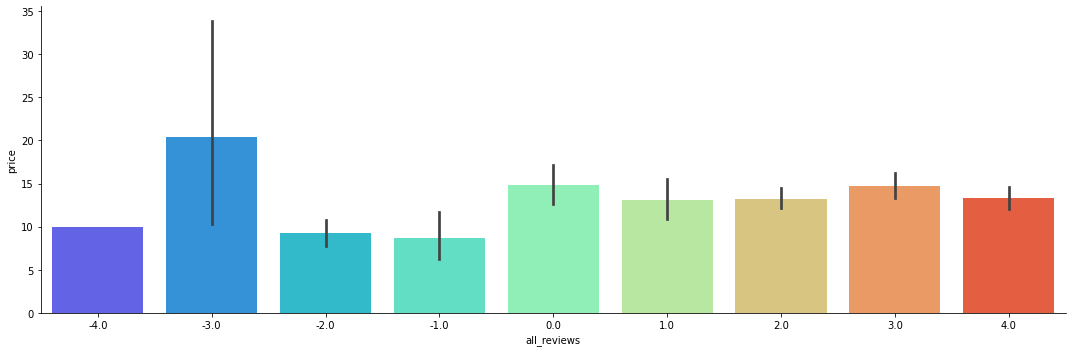

In [164]:
sns.catplot(x = "all_reviews", y = "price", data = df, palette = "rainbow", kind = "bar", aspect = 3)

-3.0 has the highest price in average

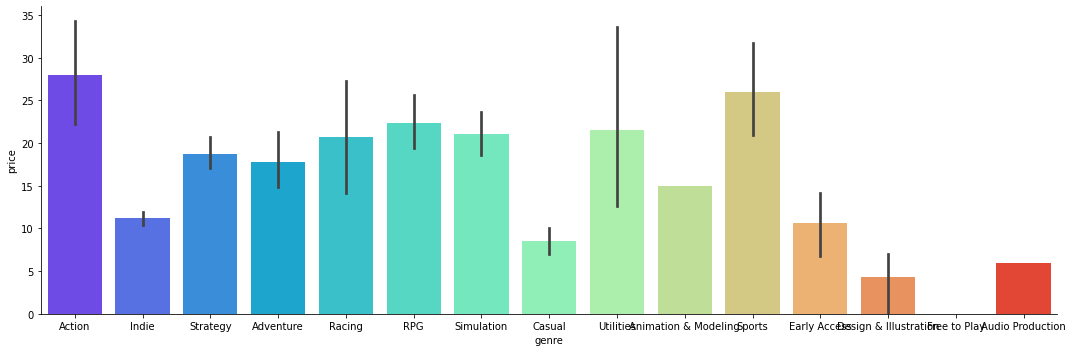

In [36]:
sns.catplot(x = "genre", y = "price", data = df, palette = "rainbow", kind = "bar", aspect = 3)

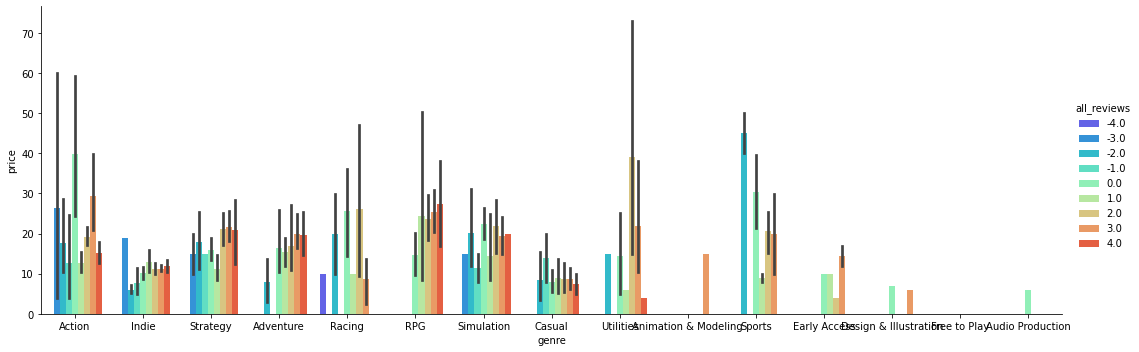

In [37]:
sns.catplot(x = "genre", y = "price", hue = "all_reviews", data = df, palette = "rainbow", kind = "bar", aspect = 3)

Mostly bad review games have a higher price in average

In [38]:
df.groupby("price")["price"].count()

price
0.00      819
0.49       67
0.50        6
0.51        7
0.54        2
         ... 
199.99      1
231.57      4
367.96     13
424.72     24
906.48     11
Name: price, Length: 397, dtype: int64

In [39]:
df['binned_price'] = pd.cut(df.price,bins=[0, 5, 10, 20, 50, 1000])

In [40]:
df.head()

types                           name  recent_reviews  all_reviews  \
0   app                           DOOM             3.0          3.0   
1   app  PLAYERUNKNOWN'S BATTLEGROUNDS             0.0          0.0   
2   app                     BATTLETECH             0.0          2.0   
6   app                Devil May Cry 5             3.0          3.0   
7   app               Human: Fall Flat             3.0          3.0   

  release_year            developer  popular_tags  game_details  languages  \
0         2016          id Software            20           7.0         10   
1         2017     PUBG Corporation            20           3.0         17   
2         2018  Harebrained Schemes            20           7.0          4   
6         2019     CAPCOM Co., Ltd.            20           7.0         12   
7         2016      No Brakes Games            20           9.0         15   

   achievements  genre_counts   genre  price binned_price  
0          54.0           1.0  Action  14.99     (10, 20]  
1          37.0           3.0  Action  29.99     (20, 50]  
2         128.0           3.0  Action  39.99     (20, 50]  
6          51.0           1.0  Action  59.99   (50, 1000]  
7          55.0           2.0   Indie  14.99     (10, 20]

<AxesSubplot:ylabel='binned_price'>

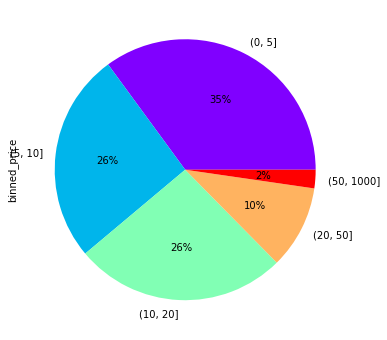

In [41]:
df.groupby('binned_price')['binned_price'].count().plot(kind='pie', autopct = '%.0f%%', figsize = (10,6), cmap = "rainbow")

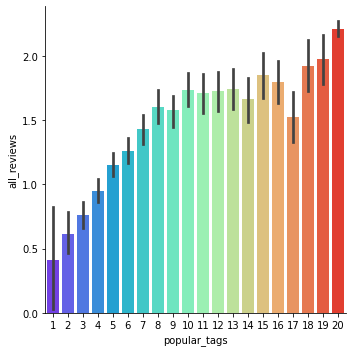

In [42]:
sns.catplot(x = "popular_tags", y = "all_reviews", data = df, palette = "rainbow", kind = "bar")

The higher the popular_tags is, the better the reviews.

In [43]:
df['binned_achievements'] = pd.cut(df.achievements, bins=[0, 5, 10, 20, 50, 10000])

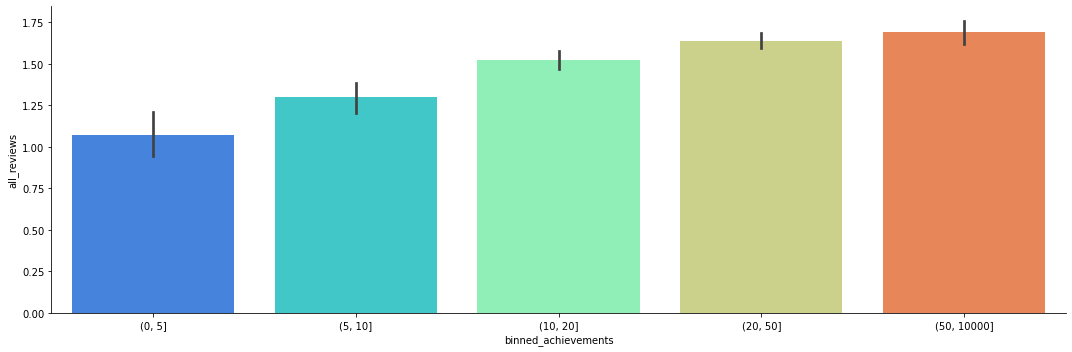

In [165]:
sns.catplot(x = "binned_achievements", y = "all_reviews", data = df, palette = "rainbow", kind = "bar", aspect = 3)

The higher the number of achievements is, the better the reviews.

In [45]:
df_lang

types                           name  recent_reviews  all_reviews  \
0       app                           DOOM             3.0          3.0   
1       app  PLAYERUNKNOWN'S BATTLEGROUNDS             0.0          0.0   
2       app                     BATTLETECH             0.0          2.0   
6       app                Devil May Cry 5             3.0          3.0   
7       app               Human: Fall Flat             3.0          3.0   
...     ...                            ...             ...          ...   
40557   app                        Grabity             NaN          1.0   
40598   app       Detached: Non-VR Edition             NaN          2.0   
40611   app                  A Room Beyond             NaN          1.0   
40728   app              Chasing the Stars             NaN          2.0   
40799   app            Fruit Tower Defense             NaN          NaN   

       release_date              developer  \
0      May 12, 2016            id Software   
1      Dec 21, 2017       PUBG Corporation   
2      Apr 24, 2018    Harebrained Schemes   
6       Mar 7, 2019       CAPCOM Co., Ltd.   
7      Jul 22, 2016        No Brakes Games   
...             ...                    ...   
40557  May 30, 2018      Team Ninja Thumbs   
40598  Jul 24, 2018         Anshar Studios   
40611  Jun 13, 2017           René Bühling   
40728  Jan 23, 2019            Ertal Games   
40799  Jul 25, 2018  Fratboy Entertainment   

                                            popular_tags  \
0      FPS,Gore,Action,Demons,Shooter,First-Person,Gr...   
1      Survival,Shooter,Multiplayer,Battle Royale,PvP...   
2      Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...   
6      Action,Hack and Slash,Great Soundtrack,Demons,...   
7      Funny,Multiplayer,Co-op,Puzzle,Physics,Local C...   
...                                                  ...   
40557  Indie,Action,4 Player Local,Local Multiplayer,...   
40598  Simulation,Indie,Space,Exploration,Atmospheric...   
40611                      Adventure,Indie,Point & Click   
40728  Nudity,Sexual Content,Indie,Steampunk,Story Ri...   
40799      Strategy,Adventure,Indie,Casual,Tower Defense   

                                            game_details  \
0      Single-player,Multi-player,Co-op,Steam Achieve...   
1                 Multi-player,Online Multi-Player,Stats   
2      Single-player,Multi-player,Online Multi-Player...   
6      Single-player,Online Multi-Player,Online Co-op...   
7      Single-player,Online Multi-Player,Local Co-op,...   
...                                                  ...   
40557  Single-player,Multi-player,Online Multi-Player...   
40598  Single-player,Multi-player,Online Multi-Player...   
40611  Single-player,Steam Achievements,Steam Trading...   
40728  Single-player,Steam Achievements,Profile Featu...   
40799  Single-player,Steam Achievements,Profile Featu...   

                                               languages  achievements  \
0      English,French,Italian,German,Spanish - Spain,...          54.0   
1      English,Korean,Simplified Chinese,French,Germa...          37.0   
2                          English,French,German,Russian         128.0   
6      English,French,Italian,German,Spanish - Spain,...          51.0   
7      English,French,German,Spanish - Spain,Russian,...          55.0   
...                                                  ...           ...   
40557   English,German,French,Portuguese,Spanish - Spain          15.0   
40598    English,French,German,Simplified Chinese,Polish          47.0   
40611      English,German,French,Italian,Spanish - Spain          44.0   
40728                                            English          12.0   
40799                                            English           6.0   

                                        genre  original_price  discount_price  
0                                      Action           19.99           14.99  
1      Action,Adventure,Massively Multiplayer           29.99

### Popular Tags

In [46]:
df_lang.popular_tags=df_lang.popular_tags.str.split(',')

In [47]:
master_list = [element for sublist in df_lang["popular_tags"].tolist() for element in sublist]
d = Counter(master_list)
tags_count = pd.DataFrame.from_dict(d, orient = 'index').reset_index()


In [48]:
tags_count.sort_values(by = 0, ascending = False).reset_index(drop = True)
tags_count.set_index('index')
tags_count = tags_count.loc[0:10]
tags_count

index     0
0                FPS   558
1               Gore   823
2             Action  5813
3             Demons    75
4            Shooter   916
5       First-Person   845
6   Great Soundtrack  2164
7        Multiplayer  1665
8       Singleplayer  4190
9         Fast-Paced   458
10            Sci-fi   968

<AxesSubplot:ylabel='0'>

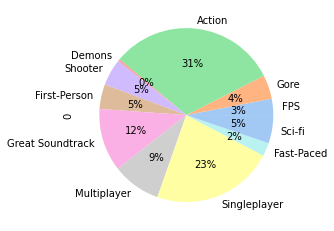

In [49]:
tags_count.plot(y = 0, kind = 'pie', autopct = '%.0f%%', colors = sns.color_palette('pastel'), labels = tags_count['index'], legend = False)

### Popular Languages

In [50]:
df_lang.languages=df_lang.languages.str.split(',')


In [51]:
master_list = [element for sublist in df_lang["languages"].tolist() for element in sublist]
d = Counter(master_list)
lang_count = pd.DataFrame.from_dict(d, orient = 'index').reset_index()

In [52]:
lang_count.sort_values(by = 0, ascending = False).reset_index(drop = True)
lang_count.set_index('index')
lang_count = lang_count.loc[0:10]
lang_count

index      0
0               English  11641
1                French   3952
2               Italian   2946
3                German   4196
4       Spanish - Spain   3728
5              Japanese   2576
6                Polish   1638
7   Portuguese - Brazil   1895
8               Russian   3809
9   Traditional Chinese   1396
10               Korean   1597

<AxesSubplot:ylabel='0'>

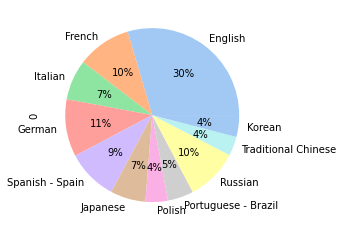

In [53]:
lang_count.plot(y = 0, kind = 'pie', autopct = '%.0f%%', colors = sns.color_palette('pastel'), labels = lang_count['index'], legend = False)

### Popular Developers

<AxesSubplot:ylabel='developer'>

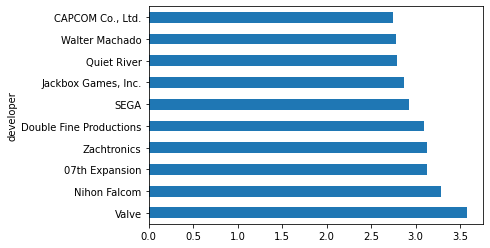

In [54]:
df_lang[df_lang.groupby('developer')['developer'].transform('count').ge(8)].groupby('developer')['all_reviews'].mean().nlargest(10).plot.barh()

# <u> 4. Machine Learning 

# (1) Classification

### Decision Tree

In [55]:
df_dt = df.copy()

In [56]:
df_dt.all_reviews.mean()

1.5485611510791366

In [57]:
df_dt

types                           name  recent_reviews  all_reviews  \
0       app                           DOOM             3.0          3.0   
1       app  PLAYERUNKNOWN'S BATTLEGROUNDS             0.0          0.0   
2       app                     BATTLETECH             0.0          2.0   
6       app                Devil May Cry 5             3.0          3.0   
7       app               Human: Fall Flat             3.0          3.0   
...     ...                            ...             ...          ...   
40524   app               Lil Big Invasion             NaN          1.0   
40557   app                        Grabity             NaN          1.0   
40598   app       Detached: Non-VR Edition             NaN          2.0   
40611   app                  A Room Beyond             NaN          1.0   
40728   app              Chasing the Stars             NaN          2.0   

      release_year            developer  popular_tags  game_details  \
0             2016          id Software            20           7.0   
1             2017     PUBG Corporation            20           3.0   
2             2018  Harebrained Schemes            20           7.0   
6             2019     CAPCOM Co., Ltd.            20           7.0   
7             2016      No Brakes Games            20           9.0   
...            ...                  ...           ...           ...   
40524         2016      Andreas Britten             9           5.0   
40557         2018    Team Ninja Thumbs            11          12.0   
40598         2018       Anshar Studios             6           9.0   
40611         2017         René Bühling             3           4.0   
40728         2019          Ertal Games             6           3.0   

       languages  achievements  genre_counts   genre  price    binned_price  \
0             10          54.0           1.0  Action  14.99    (10.0, 20.0]   
1             17          37.0           3.0  Action  29.99    (20.0, 50.0]   
2              4         128.0           3.0  Action  39.99    (20.0, 50.0]   
6             12          51.0           1.0  Action  59.99  (50.0, 1000.0]   
7             15          55.0           2.0   Indie  14.99    (10.0, 20.0]   
...          ...           ...           ...     ...    ...             ...   
40524          1          45.0           3.0   Indie   2.99      (0.0, 5.0]   
40557          5          15.0           2.0   Indie   0.00             NaN   
40598          5          47.0           2.0   Indie  14.99    (10.0, 20.0]   
40611          5          44.0           2.0   Indie   7.99     (5.0, 10.0]   
40728          1          12.0           1.0   Indie   9.99     (5.0, 10.0]   

      binned_achievements  
0             (50, 10000]  
1                (20, 50]  
2             (50, 10000]  
6             (50, 10000]  
7             (50, 10000]  
...                   ...  
40524            (20, 50]  
40557            (10, 20]  
40598            (20, 50]  
40611            (20, 50]  
40728            (10, 20]  

[8896 rows x 15 columns]

In [58]:
# Drop columns that contain duplicated or unnecessary information
df_dt.drop('types', axis=1, inplace=True)
df_dt.drop('name', axis=1, inplace=True)
df_dt.drop('recent_reviews', axis=1, inplace=True)
df_dt.drop('developer', axis = 1, inplace = True)
df_dt.drop('genre', axis=1, inplace=True)
df_dt.drop('binned_price', axis=1, inplace=True)
df_dt.drop('binned_achievements', axis=1, inplace=True)

In [59]:
df_dt.head()

all_reviews release_year  popular_tags  game_details  languages  \
0          3.0         2016            20           7.0         10   
1          0.0         2017            20           3.0         17   
2          2.0         2018            20           7.0          4   
6          3.0         2019            20           7.0         12   
7          3.0         2016            20           9.0         15   

   achievements  genre_counts  price  
0          54.0           1.0  14.99  
1          37.0           3.0  29.99  
2         128.0           3.0  39.99  
6          51.0           1.0  59.99  
7          55.0           2.0  14.99

In [60]:
df_dt = df_dt.dropna()

In [61]:
df_dt.isnull().any()

all_reviews     False
release_year    False
popular_tags    False
game_details    False
languages       False
achievements    False
genre_counts    False
price           False
dtype: bool

In [62]:
# Create X and Y for Decision Tree Classifier
X = df_dt.drop("all_reviews", axis=1)
Y = df_dt.all_reviews

In [63]:
Y

0        3.0
1        0.0
2        2.0
6        3.0
7        3.0
        ... 
40524    1.0
40557    1.0
40598    2.0
40611    1.0
40728    2.0
Name: all_reviews, Length: 8852, dtype: float64

In [64]:
dt = tree.DecisionTreeClassifier(max_depth = 5)

dt.fit(X,Y)

DecisionTreeClassifier(max_depth=5)

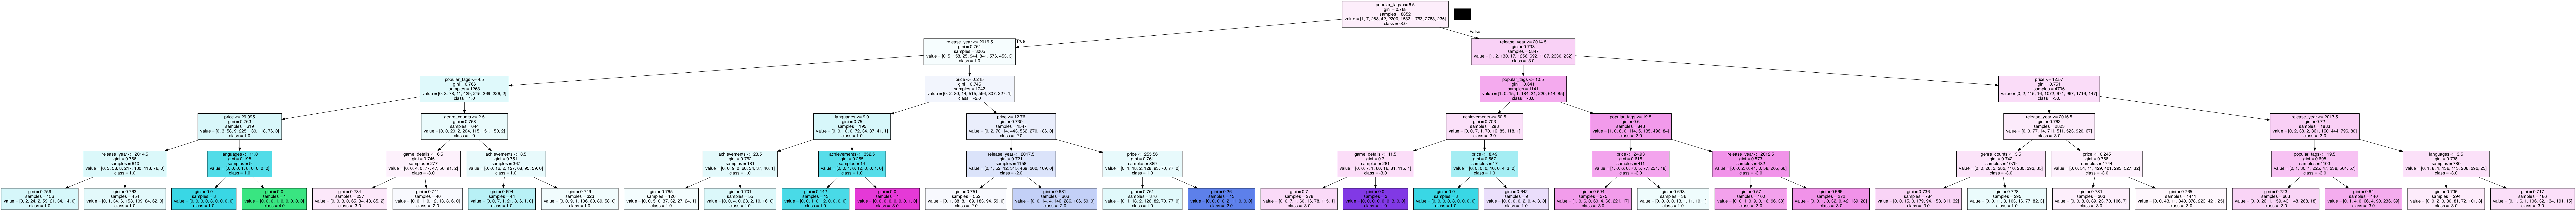

In [65]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Random Forest

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
df_rf = df_dt.copy()

In [68]:
df_rf['all_reviews_bin'] = df.all_reviews.apply(lambda x: 1.0 if x > 0 else 0)

In [69]:
df_rf

all_reviews release_year  popular_tags  game_details  languages  \
0              3.0         2016            20           7.0         10   
1              0.0         2017            20           3.0         17   
2              2.0         2018            20           7.0          4   
6              3.0         2019            20           7.0         12   
7              3.0         2016            20           9.0         15   
...            ...          ...           ...           ...        ...   
40524          1.0         2016             9           5.0          1   
40557          1.0         2018            11          12.0          5   
40598          2.0         2018             6           9.0          5   
40611          1.0         2017             3           4.0          5   
40728          2.0         2019             6           3.0          1   

       achievements  genre_counts  price  all_reviews_bin  
0              54.0           1.0  14.99              1.0  
1              37.0           3.0  29.99              0.0  
2             128.0           3.0  39.99              1.0  
6              51.0           1.0  59.99              1.0  
7              55.0           2.0  14.99              1.0  
...             ...           ...    ...              ...  
40524          45.0           3.0   2.99              1.0  
40557          15.0           2.0   0.00              1.0  
40598          47.0           2.0  14.99              1.0  
40611          44.0           2.0   7.99              1.0  
40728          12.0           1.0   9.99              1.0  

[8852 rows x 9 columns]

In [70]:
X = df_rf.drop(["all_reviews_bin", 'all_reviews'],axis=1)
Y = df_rf.all_reviews_bin

In [71]:
train_test_split(X,Y,test_size=0.3,random_state = 0)

[      release_year  popular_tags  game_details  languages  achievements  \
 25744         2015             9           5.0          1           5.0   
 1897          2011            10           5.0          7          54.0   
 6607          2016             7           7.0          6          13.0   
 6508          2017             2           4.0          7          24.0   
 1664          2019            17           4.0          9          45.0   
 ...            ...           ...           ...        ...           ...   
 8841          2017            13           2.0          1           1.0   
 26156         2018             4           3.0          4          17.0   
 10335         2018             3           2.0          2          22.0   
 5874          2016             5           4.0          1           8.0   
 4660          2016            10           1.0          2          28.0   
 
        genre_counts  price  
 25744           2.0  14.99  
 1897            2.0   0.0

In [72]:
# Create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [73]:
# Check the length
len(X)

8852

In [74]:
len(X_train)

6196

In [75]:
len(X_test)

2656

In [76]:
len(X_train) / len(X)

0.6999548124717578

In [77]:
len(X_test)/len(X)

0.3000451875282422

In [78]:
(len(X_train) + len(X_test)) == len(X)

True

### Train on the trainining set

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
cl = RandomForestClassifier(random_state = 0)

cl.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [81]:
len(X_train)

6196

In [82]:
len(X_test)

2656

### predict 

In [83]:
cl.predict(X_test)

array([1., 1., 1., ..., 1., 1., 1.])

Accuracy ..

In [84]:
(cl.predict(X_test) == Y_test).mean()

0.7168674698795181

In [85]:
y_pred = cl.predict(X_test)
y_pred[:20]

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1.])

In [86]:
cl.predict_proba(X_test)

array([[0.44, 0.56],
       [0.2 , 0.8 ],
       [0.36, 0.64],
       ...,
       [0.41, 0.59],
       [0.1 , 0.9 ],
       [0.27, 0.73]])

In [87]:
y_pred[:20]

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1.])

Every classifier will also give a prediction output with probability

In [88]:
cl.predict_proba(X_test)

array([[0.44, 0.56],
       [0.2 , 0.8 ],
       [0.36, 0.64],
       ...,
       [0.41, 0.59],
       [0.1 , 0.9 ],
       [0.27, 0.73]])

In [89]:
cl.predict_proba(X_test)[:,1]

array([0.56, 0.8 , 0.64, ..., 0.59, 0.9 , 0.73])

In [90]:
y_pred_proba = cl.predict_proba(X_test)[:,1]

In [91]:
y_pred_proba[:20]

array([0.56  , 0.8   , 0.64  , 0.89  , 0.56  , 0.47  , 0.87  , 0.79  ,
       0.9   , 0.42  , 0.66  , 0.5   , 0.87  , 0.92  , 0.6075, 0.27  ,
       0.51  , 0.54  , 0.17  , 0.71  ])

### Collect Scores

In [92]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

In [93]:
confusion_matrix(Y_test, y_pred)

array([[ 169,  581],
       [ 171, 1735]])

In [94]:
# Accuracy
(y_pred == Y_test).mean()

0.7168674698795181

In [95]:
met.accuracy_score(Y_test, y_pred)

0.7168674698795181

In [96]:
# Precision
met.precision_score(Y_test,y_pred)

0.7491364421416234

In [97]:
# Recall
met.recall_score(Y_test,y_pred)

0.9102833158447009

In [98]:
# AUC score
met.roc_auc_score(Y_test,y_pred_proba)

0.652765652325988

#### Cross-validation

In [99]:
from sklearn.model_selection import KFold

In [100]:
nfolds = 10

In [101]:
kf = KFold(n_splits = nfolds, random_state = 0, shuffle = True)

In [102]:
sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1, scoring='roc_auc')

array([0.65605911, 0.65417475, 0.66217966, 0.63666044, 0.67613905,
       0.60964923, 0.64498721, 0.63375077, 0.68878189, 0.66949081])

In [103]:
avgCV_AUC = sk.model_selection.cross_val_score(cl, X, Y, cv=kf, n_jobs = -1, scoring = 'roc_auc').mean()

### Which one is better?

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clfs = [DecisionTreeClassifier(), sk.ensemble.RandomForestClassifier(n_jobs=-1), sk.naive_bayes.GaussianNB(),
        sk.linear_model.LogisticRegression(n_jobs=-1),sk.tree.DecisionTreeClassifier(),sk.ensemble.AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

In [105]:
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier() 0.5458790916089558
RandomForestClassifier(n_jobs=-1) 0.6535238058021324
GaussianNB() 0.613957771494373
LogisticRegression(n_jobs=-1) 0.6248034068827456
DecisionTreeClassifier() 0.5491052120578004


/Users/ericluong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ericluong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

AdaBoostClassifier() 0.6484978245195939
QuadraticDiscriminantAnalysis() 0.6288260025746361
MLPClassifier() 0.6231370612480124
SVC() 0.5424433900737756
***********************************************
Best is... RandomForestClassifier(n_jobs=-1) 0.6535238058021324


In [106]:
### Random Forest

from sklearn.model_selection import train_test_split

# Create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Check the length
len(X)
len(X_train)
len(X_test)
len(X_train) / float (len(X))

from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(random_state = 0)

cl.fit(X_train, Y_train)

cl.predict(X_test)

(cl.predict(X_test) == Y_test).mean()

y_pred = cl.predict(X_test)
y_pred[:20]

cl.predict_proba(X_test)[:, 1]

y_pred_proba = cl.predict_proba(X_test)[:, 1]
y_pred_proba[:20]

#### Collect Scores

# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

# Accuracy
(y_pred == Y_test).mean()

# Precision
import sklearn.metrics as met
met.precision_score(Y_test,y_pred)

Y_test.mean()

# Recall
met.recall_score(Y_test,y_pred)

# AUC score
met.roc_auc_score(Y_test,y_pred_proba)

#### Cross-validation

from sklearn.model_selection import KFold

nfolds = 10

kf = KFold(n_splits = nfolds, random_state = 0, shuffle = True)

sk.model_selection.cross_val_score(cl, X, Y, cv=kf, n_jobs = -1, scoring = 'roc_auc').mean()

avgCV_AUC = sk.model_selection.cross_val_score(cl, X, Y, cv=kf, n_jobs = -1, scoring = 'roc_auc').mean()

### Which one is better?

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clfs = [DecisionTreeClassifier(), sk.ensemble.RandomForestClassifier(n_jobs=-1), sk.naive_bayes.GaussianNB(),
        sk.linear_model.LogisticRegression(n_jobs=-1),sk.tree.DecisionTreeClassifier(),sk.ensemble.AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier() 0.5477358496156004
RandomForestClassifier(n_jobs=-1) 0.6544900760502123
GaussianNB() 0.613957771494373
LogisticRegression(n_jobs=-1) 0.6248034068827456
DecisionTreeClassifier() 0.5484198307682817


/Users/ericluong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ericluong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

AdaBoostClassifier() 0.6484978245195939
QuadraticDiscriminantAnalysis() 0.6288260025746361
MLPClassifier() 0.6186605628299909
SVC() 0.5424433900737756
***********************************************
Best is... RandomForestClassifier(n_jobs=-1) 0.6544900760502123


### Use KMeans to find 3 clusters

In [107]:
from sklearn.cluster import KMeans

In [108]:
df_dt.head()

all_reviews release_year  popular_tags  game_details  languages  \
0          3.0         2016            20           7.0         10   
1          0.0         2017            20           3.0         17   
2          2.0         2018            20           7.0          4   
6          3.0         2019            20           7.0         12   
7          3.0         2016            20           9.0         15   

   achievements  genre_counts  price  
0          54.0           1.0  14.99  
1          37.0           3.0  29.99  
2         128.0           3.0  39.99  
6          51.0           1.0  59.99  
7          55.0           2.0  14.99

In [109]:
clu = KMeans(n_clusters=3, random_state=0)

In [110]:
type(clu)

sklearn.cluster._kmeans.KMeans

In [111]:
clu

KMeans(n_clusters=3, random_state=0)

In [112]:
clu.fit(df_dt)

KMeans(n_clusters=3, random_state=0)

In [113]:
clu.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

### Getting summary information on the clusters' characteristics

In [114]:
df2 = df.copy()

In [115]:
df2.drop('types', axis=1, inplace=True)
df2.drop('name', axis=1, inplace=True)
df2.drop('recent_reviews', axis=1, inplace=True)
df2.drop('developer', axis = 1, inplace = True)
df2.drop('genre', axis=1, inplace=True)
df2.drop('binned_price', axis=1, inplace=True)
df2.drop('binned_achievements', axis=1, inplace=True)

In [116]:
df2 = df2.dropna()

In [117]:
df2['cluster']=clu.labels_

In [118]:
df2.head()

all_reviews release_year  popular_tags  game_details  languages  \
0          3.0         2016            20           7.0         10   
1          0.0         2017            20           3.0         17   
2          2.0         2018            20           7.0          4   
6          3.0         2019            20           7.0         12   
7          3.0         2016            20           9.0         15   

   achievements  genre_counts  price  cluster  
0          54.0           1.0  14.99        0  
1          37.0           3.0  29.99        0  
2         128.0           3.0  39.99        0  
6          51.0           1.0  59.99        0  
7          55.0           2.0  14.99        0

In [119]:
df2.groupby('cluster').mean()

all_reviews  popular_tags  game_details  languages  achievements  \
cluster                                                                     
0           1.558169     10.751147      4.762047   4.782125     35.068954   
1           0.632184     11.195402      2.379310   1.862069   4953.505747   
2           1.408163      7.918367      3.897959  10.204082   1821.367347   

         genre_counts      price  
cluster                           
0            2.746788  13.960184  
1            3.402299  12.761609  
2            2.428571   5.206531

### Anything that is highly correlated and can be dropped ?

In [120]:
df2.corr()

all_reviews  popular_tags  game_details  languages  \
all_reviews      1.000000      0.314462      0.125035   0.099120   
popular_tags     0.314462      1.000000      0.256610   0.206535   
game_details     0.125035      0.256610      1.000000   0.149380   
languages        0.099120      0.206535      0.149380   1.000000   
achievements    -0.058304      0.009342     -0.097864  -0.015736   
genre_counts    -0.078199      0.095812      0.048544  -0.052187   
price            0.009490      0.087464      0.059901   0.022191   
cluster         -0.042335     -0.024605     -0.081114   0.033295   

              achievements  genre_counts     price   cluster  
all_reviews      -0.058304     -0.078199  0.009490 -0.042335  
popular_tags      0.009342      0.095812  0.087464 -0.024605  
game_details     -0.097864      0.048544  0.059901 -0.081114  
languages        -0.015736     -0.052187  0.022191  0.033295  
achievements      1.000000      0.045623 -0.003724  0.738054  
genre_counts      0.045623      1.000000 -0.067610  0.013279  
price            -0.003724     -0.067610  1.000000 -0.014236  
cluster           0.738054      0.013279 -0.014236  1.000000

### Finding the best clustering method

In [121]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,6):
    print ('k= %d ' % k)
    clus = [KMeans(n_clusters=k), Birch(n_clusters=k), AgglomerativeClustering(n_clusters=k)]
    #clus = [KMeans(n_clusters=k,n_jobs=-1)]
    for cl in clus:
        res = cl.fit(df2)
        sil = metrics.silhouette_score(df2, res.labels_)
        print (str(cl)[:6] + ' with k=' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl
            bestK = k
print('***********************************************')
print ('Best algorithm is... ' + str(bestCl)[:6] + '  with k=' +str(bestK) )
print('**********************')
print ('With Silhouette Score ' + str(bestSil))

k= 2 
KMeans with k=2: 0.9846
Birch( with k=2: 0.9843
Agglom with k=2: 0.9843
k= 3 
KMeans with k=3: 0.9692
Birch( with k=3: 0.9692
Agglom with k=3: 0.9692
k= 4 
KMeans with k=4: 0.9693
Birch( with k=4: 0.9693
Agglom with k=4: 0.9693
k= 5 
KMeans with k=5: 0.9501
Birch( with k=5: 0.9586
Agglom with k=5: 0.9586
***********************************************
Best algorithm is... KMeans  with k=2
**********************
With Silhouette Score 0.9845544536172461


# Regression for Data Exploration

## Lasso

Lasso will try to minimize the number of attributes used for the prediction, which gives us insights about which attributes are most important.

In [122]:
from sklearn import linear_model
regLasso = linear_model.Lasso()

In [123]:
regLasso.fit(X,Y)

Lasso()

Explore relevant attributes

In [124]:
df_dt.head(1)

all_reviews release_year  popular_tags  game_details  languages  \
0          3.0         2016            20           7.0         10   

   achievements  genre_counts  price  
0          54.0           1.0  14.99

In [125]:
regLasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.64464997e-05, -0.00000000e+00, -0.00000000e+00])

In [126]:
df_dt.shape

(8852, 8)

In [127]:
len(regLasso.coef_)

7

In [128]:
df_dt.columns

Index(['all_reviews', 'release_year', 'popular_tags', 'game_details',
       'languages', 'achievements', 'genre_counts', 'price'],
      dtype='object')

### Need to generate a table display each column's regLasso.coef_

In [129]:
d = {X.columns[i] : regLasso.coef_[i] for i in range(0,len(X.columns))}

In [130]:
type(d)

dict

In [131]:
d

{'release_year': -0.0,
 'popular_tags': 0.0,
 'game_details': 0.0,
 'languages': 0.0,
 'achievements': -3.644649972087685e-05,
 'genre_counts': -0.0,
 'price': -0.0}

Convert it to a series...

In [132]:
s = pd.Series(d)

In [133]:
s[s != 0]

achievements   -0.000036
dtype: float64

## Decision Tree Regressor

Decision tree regressors predict one fixed value depending on the leaf reached by the object.

Build and train

In [134]:
import sklearn.tree

In [166]:
dt = sklearn.tree.DecisionTreeRegressor(max_depth = 3)

In [167]:
dt.fit(X,Y)

DecisionTreeRegressor(max_depth=3)

Visualize the tree

In [168]:
Y.mean()

0.7132851333032083

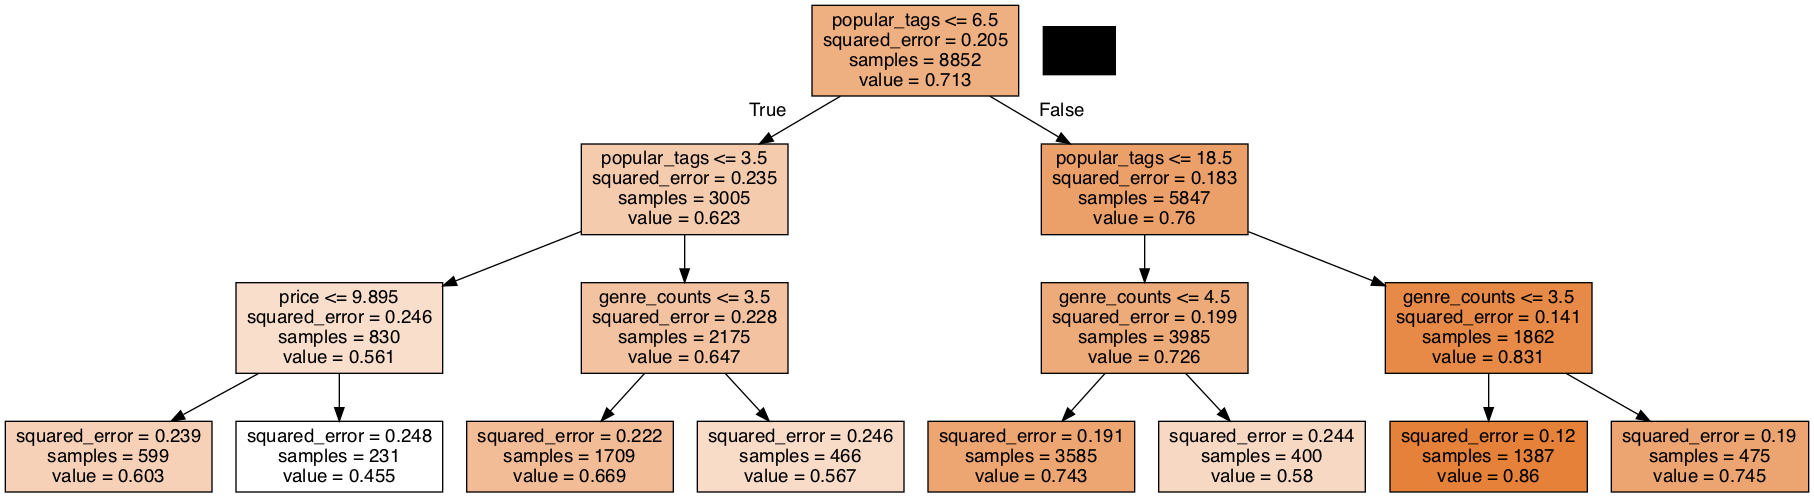

In [169]:
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# Regression for Prediction

Let's split X and Y into training and test

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                            test_size=0.3,random_state=0)

Train and predict with Lasso

In [141]:
regLasso = linear_model.Lasso()

In [142]:
regLasso.fit(X_train,Y_train)

Lasso()

In [143]:
y_pred = regLasso.predict(X_test)

In [144]:
y_pred

array([0.71314632, 0.71327906, 0.71325251, ..., 0.71282775, 0.71354453,
       0.71319941])

## Metrics

### Mean absolute error / Mean Absolute Deviation (MAD)

The average of the absolute values of the errors

In [145]:
y_pred

array([0.71314632, 0.71327906, 0.71325251, ..., 0.71282775, 0.71354453,
       0.71319941])

#### Mean absolute error / MAD

In [146]:
(y_pred - Y_test).abs().mean()

0.4072010748091857

#### Mean squared error / MSE

The average of the errors squared

In [147]:
((y_pred - Y_test)**2).mean()

0.20197097740848222

## Find the best regressors

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

regs = [LinearRegression(), ElasticNet(), DecisionTreeRegressor(), GradientBoostingRegressor(), MLPRegressor()]#, SVR()]
 

Find the predictor that minimizes the cross-validated MAD.

In [149]:
from sklearn.model_selection import KFold

In [150]:
minMAD = 10000000
nfolds = 3
bestREG = ''

for reg in regs:
    kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
    mad = sklearn.model_selection.cross_val_score(reg,X,Y,\
             cv=kf,scoring='neg_mean_absolute_error').mean()
    # need the lowest scoring for mad
    print (str(reg)[:25] + ' with mad= ' + str(mad) )
    if mad < minMAD:
        minMAD = mad
        bestREG = reg
        
print('***********************************************')
print ('Best Regressor is... ' + str(bestREG)[:25] )
print('**********************')
print ('With MAD Score ' + str(minMAD))
        

LinearRegression() with mad= -0.3933907271317915
ElasticNet() with mad= -0.40826006934802567
DecisionTreeRegressor() with mad= -0.3827106869834414
GradientBoostingRegressor with mad= -0.37790780546361713
MLPRegressor() with mad= -0.5128520896496004
***********************************************
Best Regressor is... MLPRegressor()
**********************
With MAD Score -0.5128520896496004


### PCA

In [151]:
from sklearn import decomposition

In [152]:
#centering data
X.drop('release_year', axis = 1, inplace = True)
df_dt.drop('release_year', axis = 1, inplace = True)
X.head()

/var/folders/42/0ktpxb410cg701991z265xdw0000gn/T/ipykernel_45080/1421854093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt.drop('release_year', axis = 1, inplace = True)


popular_tags  game_details  languages  achievements  genre_counts  price
0            20           7.0         10          54.0           1.0  14.99
1            20           3.0         17          37.0           3.0  29.99
2            20           7.0          4         128.0           3.0  39.99
6            20           7.0         12          51.0           1.0  59.99
7            20           9.0         15          55.0           2.0  14.99

In [153]:
X_centered = X-X.mean()
X_centered = (X_centered/X_centered.std()).dropna()

In [154]:
pca = decomposition.PCA(n_components = 3)
pca_sk = pd.DataFrame(pca.fit_transform(X_centered))

In [155]:
df_dt = df_dt.reset_index()

In [156]:
import plotly.express as px
import plotly

fig = px.scatter_3d(pca_sk, x=0, y=1, z=2, color = df_dt['all_reviews'], )

In [157]:
fig.show()

### Skree Plot & Variance

In [158]:
#helper function returns s from PCA
def return_s(data, k):
    u, s, vt = np.linalg.svd(data, full_matrices = False)
    return s

In [159]:
# helper function returns vt from PCA
def return_vt(data, k):
    u, s, vt = np.linalg.svd(data, full_matrices = False)
    return vt
    
vt = return_vt(X_centered, 3)

Text(0, 0.5, 'Variance')

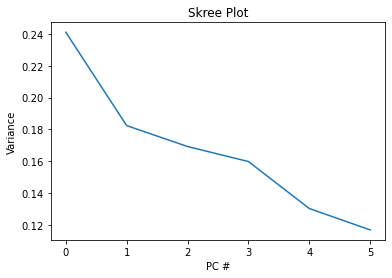

In [160]:
s = return_s(X_centered, 3)
plt.plot(s ** 2 / sum(s ** 2))
plt.title("Skree Plot")
plt.xlabel('PC #')
plt.ylabel('Variance')